# DNN

### 상수 값으로 풀어보는 XOR  예제

![xor_nn_1](https://user-images.githubusercontent.com/661959/54298177-9e82f080-45fb-11e9-8bdd-1f86718c6f5d.png)




In [1]:
import tensorflow as tf
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
Y = np.array([[0], [1], [1], [0]], dtype=np.float32)


W1 = tf.Variable(np.array([[5,-7], [5,-7]], dtype=np.float32), name='weight1')
b1 = tf.Variable(np.array([[-8, 3]], dtype=np.float32), name='bias1')
L1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(np.array([[-11],[-11]], dtype=np.float32), name='weight2')
b2 = tf.Variable(np.array([6], dtype=np.float32), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(L1, W2) + b2)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = np.mean(predicted == Y)

print(f"\nHypothesis:\n{hypothesis} \nPredicted:\n{predicted} \nAccuracy:\n{accuracy}")


Hypothesis:
[[0.01118422]
 [0.99493575]
 [0.99493575]
 [0.02438851]] 
Predicted:
[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:
1.0


#### XOR 문제 MLP 학습 예제
* 앞서 상수로 풀었던 XOR 문제를 MLP 학습으로 해결

In [2]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

W1 = tf.Variable(tf.random.normal([2, 2], seed=0))
b1 = tf.Variable(tf.random.normal([2], seed=0))

W2 = tf.Variable(tf.random.normal([2, 1], seed=0))
b2 = tf.Variable(tf.random.normal([1], seed=0))

lr = 0.1
for step in range(10001):
    with tf.GradientTape() as tape:
        layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
        hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
        cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, hypothesis))
        d_W1, d_b1, d_W2, d_b2 = tape.gradient(cost, [W1, b1, W2, b2] )
        W1.assign_sub(d_W1 * lr)
        b1.assign_sub(d_b1 * lr)
        W2.assign_sub(d_W2 * lr)
        b2.assign_sub(d_b2 * lr)
        if step % 500 == 0:
            print(f"step:{step},\t cost:{cost}")

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = np.mean(predicted == Y)

print(f"Hypothesis:{hypothesis} \nPredicted:{predicted} \nAccuracy:{accuracy}")
print(f"w1:{W1.numpy()}, b1:{b1.numpy()}, w2:{W2.numpy()}, b2{b2.numpy()}")


step:0,	 cost:0.694770336151123
step:500,	 cost:0.6929008960723877
step:1000,	 cost:0.6907983422279358
step:1500,	 cost:0.685660719871521
step:2000,	 cost:0.6681322455406189
step:2500,	 cost:0.6143726110458374
step:3000,	 cost:0.5017193555831909
step:3500,	 cost:0.30418744683265686
step:4000,	 cost:0.16250857710838318
step:4500,	 cost:0.10023446381092072
step:5000,	 cost:0.07013193517923355
step:5500,	 cost:0.053208690136671066
step:6000,	 cost:0.042575158178806305
step:6500,	 cost:0.03534673899412155
step:7000,	 cost:0.030143622308969498
step:7500,	 cost:0.0262334942817688
step:8000,	 cost:0.023195087909698486
step:8500,	 cost:0.02077030949294567
step:9000,	 cost:0.018792884424328804
step:9500,	 cost:0.01715102791786194
step:10000,	 cost:0.015767036005854607
Hypothesis:[[0.01526494]
 [0.97919655]
 [0.9864208 ]
 [0.01290687]] 
Predicted:[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:1.0
w1:[[ 6.0491767  6.1225863]
 [-5.7602525 -6.277827 ]], b1:[ 2.8576002 -3.3210492], w2:[[-9.3568  ]
 [ 9.868228]]

### Optimizer 적용

In [3]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

W1 = tf.Variable(tf.random.normal([2, 2], seed=0))
b1 = tf.Variable(tf.random.normal([2], seed=0))

W2 = tf.Variable(tf.random.normal([2, 1], seed=0))
b2 = tf.Variable(tf.random.normal([1], seed=0))

lr = 0.001
opt = tf.keras.optimizers.Adam(lr)
for step in range(5001):
    with tf.GradientTape() as tape:
        layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
        hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
        cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, hypothesis))
        d_W1, d_b1, d_W2, d_b2 = tape.gradient(cost, [W1, b1, W2, b2] )
        
        opt.apply_gradients(zip([d_W1, d_b1, d_W2, d_b2], [W1, b1, W2, b2]))
        if step % 500 == 0:
            print(f"step:{step},\t cost:{cost}")

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = np.mean(predicted == Y)

print(f"Hypothesis:{hypothesis} \nPredicted:{predicted} \nAccuracy:{accuracy}")
print(f"w1:{W1.numpy()}, b1:{b1.numpy()}, w2:{W2.numpy()}, b2{b2.numpy()}")


step:0,	 cost:0.694770336151123
step:500,	 cost:0.6866353750228882
step:1000,	 cost:0.6217808723449707
step:1500,	 cost:0.471737265586853
step:2000,	 cost:0.352585107088089
step:2500,	 cost:0.2675662338733673
step:3000,	 cost:0.2067776322364807
step:3500,	 cost:0.1624653935432434
step:4000,	 cost:0.12943843007087708
step:4500,	 cost:0.10430711507797241
step:5000,	 cost:0.08483588695526123
Hypothesis:[[0.08504654]
 [0.9485382 ]
 [0.8875339 ]
 [0.07533169]] 
Predicted:[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:1.0
w1:[[ 4.9851465  5.509847 ]
 [-4.804453  -5.8524785]], b1:[ 3.0071902 -2.8788586], w2:[[-6.8803034]
 [ 5.4160385]], b2[3.8919454]


## Keras로 XOR 문제 해결하기


In [4]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation=tf.sigmoid, input_shape=(2,)), # 맨처음 inpu_shape 지정 필수(공통), 유닛수(출력수) 임의
    tf.keras.layers.Dense(1, activation=tf.sigmoid) # 마지막 Dense의 출력 1개(0,1 둘중하나, 이진분류), activation (sigmoid = 분류)
])
model.summary()
opt = tf.keras.optimizers.Adam()
model.compile(loss=tf.keras.losses.binary_crossentropy,  # 'binary_crossentropy'- 이진부류 이외 다항분류, 회귀
              optimizer=opt,
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.fit(X, y, epochs=5000, verbose=0)
model.evaluate(X, y)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 153ms/step - loss: 0.3744 - binary_accuracy: 0.5000


[0.37442994117736816, 0.5]

### Keras 문자열 설정 실습 – XOR 문제

In [23]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])  # 파라미터 지정 이게 편함. opt는 거의 adam
# adam이 loss가 낮아지도록 최소화, weight값의 등락을 결정, metrics는 검증용(정확도)
model.fit(X, y, epochs=5000, verbose=1) # verbose 중간과정 출력
model.evaluate(X, y)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 2)                 6         
                                                                 
 dense_22 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
1/1 [==============================] - 0s 462ms/step - loss: 0.7551 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7547 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.7543 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7539 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 4ms/ste

Epoch 77/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7281 - accuracy: 0.5000
Epoch 78/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7278 - accuracy: 0.5000
Epoch 79/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7275 - accuracy: 0.5000
Epoch 80/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7272 - accuracy: 0.5000
Epoch 81/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.7269 - accuracy: 0.5000
Epoch 82/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7267 - accuracy: 0.5000
Epoch 83/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7264 - accuracy: 0.5000
Epoch 84/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7261 - accuracy: 0.5000
Epoch 85/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7259 - accuracy: 0.5000
Epoch 86/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7256 - accuracy: 0.5000
Epoch 87/5

1/1 [==============================] - 0s 4ms/step - loss: 0.7099 - accuracy: 0.5000
Epoch 160/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7097 - accuracy: 0.5000
Epoch 161/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7095 - accuracy: 0.5000
Epoch 162/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.5000
Epoch 163/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.5000
Epoch 164/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 165/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7089 - accuracy: 0.5000
Epoch 166/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.5000
Epoch 167/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7086 - accuracy: 0.5000
Epoch 168/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5000
Epoch 169/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.5000
Epoch 242/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.5000
Epoch 243/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 244/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 245/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.5000
Epoch 246/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.5000
Epoch 247/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 248/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 249/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5000
Epoch 250/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.5000
Epoch 251/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.2500
Epoch 324/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.2500
Epoch 325/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.2500
Epoch 326/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.2500
Epoch 327/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.2500
Epoch 328/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.2500
Epoch 329/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.2500
Epoch 330/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.2500
Epoch 331/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.2500
Epoch 332/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.2500
Epoch 333/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.2500
Epoch 406/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.2500
Epoch 407/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.2500
Epoch 408/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.2500
Epoch 409/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.2500
Epoch 410/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.2500
Epoch 411/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.2500
Epoch 412/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.2500
Epoch 413/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.2500
Epoch 414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.2500
Epoch 415/5000


1/1 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5000
Epoch 488/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5000
Epoch 489/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5000
Epoch 490/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5000
Epoch 491/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5000
Epoch 492/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5000
Epoch 493/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5000
Epoch 494/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.5000
Epoch 495/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5000
Epoch 496/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5000
Epoch 497/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5000
Epoch 570/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6848 - accuracy: 0.5000
Epoch 571/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.5000
Epoch 572/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5000
Epoch 573/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6846 - accuracy: 0.5000
Epoch 574/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5000
Epoch 575/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5000
Epoch 576/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6845 - accuracy: 0.5000
Epoch 577/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5000
Epoch 578/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5000
Epoch 579/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5000
Epoch 652/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5000
Epoch 653/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5000
Epoch 654/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5000
Epoch 655/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.5000
Epoch 656/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.5000
Epoch 657/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.5000
Epoch 658/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5000
Epoch 659/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.5000
Epoch 660/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5000
Epoch 661/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.7500
Epoch 734/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.7500
Epoch 735/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.7500
Epoch 736/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.7500
Epoch 737/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.7500
Epoch 738/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.7500
Epoch 739/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.7500
Epoch 740/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.7500
Epoch 741/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.7500
Epoch 742/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6773 - accuracy: 0.7500
Epoch 743/5000


1/1 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.7500
Epoch 816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.7500
Epoch 817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.7500
Epoch 818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.7500
Epoch 819/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.7500
Epoch 820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.7500
Epoch 821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.7500
Epoch 822/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.7500
Epoch 823/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.7500
Epoch 824/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.7500
Epoch 825/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.5000
Epoch 898/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.5000
Epoch 899/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6676 - accuracy: 0.5000
Epoch 900/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.5000
Epoch 901/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.5000
Epoch 902/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.5000
Epoch 903/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6673 - accuracy: 0.5000
Epoch 904/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.5000
Epoch 905/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.5000
Epoch 906/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.5000
Epoch 907/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.5000
Epoch 980/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.5000
Epoch 981/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.5000
Epoch 982/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.5000
Epoch 983/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.5000
Epoch 984/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.5000
Epoch 985/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.5000
Epoch 986/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.5000
Epoch 987/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.5000
Epoch 988/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.5000
Epoch 989/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.6543 - accuracy: 0.5000
Epoch 1061/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.5000
Epoch 1062/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.5000
Epoch 1063/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.5000
Epoch 1064/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.5000
Epoch 1065/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.5000
Epoch 1066/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.5000
Epoch 1067/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.5000
Epoch 1068/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.5000
Epoch 1069/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6465 - accuracy: 0.5000
Epoch 1142/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.5000
Epoch 1143/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.5000
Epoch 1144/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.5000
Epoch 1145/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6461 - accuracy: 0.5000
Epoch 1146/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6460 - accuracy: 0.5000
Epoch 1147/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6459 - accuracy: 0.5000
Epoch 1148/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.5000
Epoch 1149/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.5000
Epoch 1150/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6381 - accuracy: 0.5000
Epoch 1223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 0.5000
Epoch 1224/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.5000
Epoch 1225/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.5000
Epoch 1226/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6377 - accuracy: 0.5000
Epoch 1227/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6376 - accuracy: 0.5000
Epoch 1228/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.5000
Epoch 1229/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.5000
Epoch 1230/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6373 - accuracy: 0.5000
Epoch 1231/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6372 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.5000
Epoch 1304/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.5000
Epoch 1305/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.5000
Epoch 1306/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.5000
Epoch 1307/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.5000
Epoch 1308/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6287 - accuracy: 0.5000
Epoch 1309/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6286 - accuracy: 0.5000
Epoch 1310/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.5000
Epoch 1311/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6284 - accuracy: 0.5000
Epoch 1312/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 0.5000
Epoch 1385/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.5000
Epoch 1386/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6198 - accuracy: 0.5000
Epoch 1387/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6196 - accuracy: 0.5000
Epoch 1388/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6195 - accuracy: 0.5000
Epoch 1389/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.5000
Epoch 1390/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6193 - accuracy: 0.5000
Epoch 1391/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.5000
Epoch 1392/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6191 - accuracy: 0.5000
Epoch 1393/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6189 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6104 - accuracy: 0.5000
Epoch 1466/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.5000
Epoch 1467/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6102 - accuracy: 0.5000
Epoch 1468/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6100 - accuracy: 0.5000
Epoch 1469/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.5000
Epoch 1470/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.5000
Epoch 1471/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.5000
Epoch 1472/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.5000
Epoch 1473/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6094 - accuracy: 0.5000
Epoch 1474/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6006 - accuracy: 0.5000
Epoch 1547/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.5000
Epoch 1548/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6003 - accuracy: 0.5000
Epoch 1549/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6002 - accuracy: 0.5000
Epoch 1550/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6001 - accuracy: 0.5000
Epoch 1551/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5999 - accuracy: 0.5000
Epoch 1552/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5998 - accuracy: 0.5000
Epoch 1553/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.5000
Epoch 1554/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5996 - accuracy: 0.5000
Epoch 1555/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5995 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5906 - accuracy: 0.5000
Epoch 1628/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5904 - accuracy: 0.5000
Epoch 1629/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5903 - accuracy: 0.5000
Epoch 1630/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.5000
Epoch 1631/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5901 - accuracy: 0.5000
Epoch 1632/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5899 - accuracy: 0.5000
Epoch 1633/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.5000
Epoch 1634/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5897 - accuracy: 0.5000
Epoch 1635/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.5000
Epoch 1636/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5805 - accuracy: 0.5000
Epoch 1709/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5804 - accuracy: 0.5000
Epoch 1710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.5000
Epoch 1711/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.5000
Epoch 1712/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.5000
Epoch 1713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5799 - accuracy: 0.5000
Epoch 1714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.5000
Epoch 1715/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5796 - accuracy: 0.5000
Epoch 1716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.5000
Epoch 1717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5794 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.5000
Epoch 1790/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.5000
Epoch 1791/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.5000
Epoch 1792/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5700 - accuracy: 0.5000
Epoch 1793/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5699 - accuracy: 0.5000
Epoch 1794/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.5000
Epoch 1795/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5697 - accuracy: 0.5000
Epoch 1796/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.5000
Epoch 1797/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.5000
Epoch 1798/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5693 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5604 - accuracy: 0.5000
Epoch 1871/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5603 - accuracy: 0.5000
Epoch 1872/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.5000
Epoch 1873/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5600 - accuracy: 0.5000
Epoch 1874/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.5000
Epoch 1875/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.5000
Epoch 1876/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.5000
Epoch 1877/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5595 - accuracy: 0.5000
Epoch 1878/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5594 - accuracy: 0.5000
Epoch 1879/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5593 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5505 - accuracy: 0.5000
Epoch 1952/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.5000
Epoch 1953/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5503 - accuracy: 0.5000
Epoch 1954/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5501 - accuracy: 0.5000
Epoch 1955/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.5000
Epoch 1956/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5499 - accuracy: 0.5000
Epoch 1957/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.5000
Epoch 1958/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5497 - accuracy: 0.5000
Epoch 1959/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5495 - accuracy: 0.5000
Epoch 1960/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5408 - accuracy: 0.5000
Epoch 2033/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5407 - accuracy: 0.5000
Epoch 2034/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.5000
Epoch 2035/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5405 - accuracy: 0.5000
Epoch 2036/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.5000
Epoch 2037/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5402 - accuracy: 0.5000
Epoch 2038/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5401 - accuracy: 0.5000
Epoch 2039/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5400 - accuracy: 0.5000
Epoch 2040/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5399 - accuracy: 0.5000
Epoch 2041/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5398 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.5000
Epoch 2114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.5000
Epoch 2115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.5000
Epoch 2116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.5000
Epoch 2117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.5000
Epoch 2118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.5000
Epoch 2119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.5000
Epoch 2120/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.5000
Epoch 2121/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.5000
Epoch 2122/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5304 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5223 - accuracy: 0.5000
Epoch 2195/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5222 - accuracy: 0.5000
Epoch 2196/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.5000
Epoch 2197/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.5000
Epoch 2198/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5219 - accuracy: 0.5000
Epoch 2199/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5217 - accuracy: 0.5000
Epoch 2200/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.5000
Epoch 2201/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5215 - accuracy: 0.5000
Epoch 2202/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.5000
Epoch 2203/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5135 - accuracy: 0.5000
Epoch 2276/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.5000
Epoch 2277/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.5000
Epoch 2278/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.5000
Epoch 2279/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.5000
Epoch 2280/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5130 - accuracy: 0.5000
Epoch 2281/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.5000
Epoch 2282/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5128 - accuracy: 0.5000
Epoch 2283/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5127 - accuracy: 0.5000
Epoch 2284/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5051 - accuracy: 0.5000
Epoch 2357/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.5000
Epoch 2358/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5049 - accuracy: 0.5000
Epoch 2359/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.5000
Epoch 2360/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.5000
Epoch 2361/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5046 - accuracy: 0.5000
Epoch 2362/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.5000
Epoch 2363/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.5000
Epoch 2364/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.5000
Epoch 2365/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4971 - accuracy: 0.5000
Epoch 2438/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4970 - accuracy: 0.5000
Epoch 2439/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.5000
Epoch 2440/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4968 - accuracy: 0.5000
Epoch 2441/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4967 - accuracy: 0.5000
Epoch 2442/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4966 - accuracy: 0.5000
Epoch 2443/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.5000
Epoch 2444/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.5000
Epoch 2445/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.5000
Epoch 2446/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4962 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4895 - accuracy: 0.5000
Epoch 2519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4894 - accuracy: 0.5000
Epoch 2520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4893 - accuracy: 0.5000
Epoch 2521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.5000
Epoch 2522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4891 - accuracy: 0.5000
Epoch 2523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.5000
Epoch 2524/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.5000
Epoch 2525/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.5000
Epoch 2526/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.5000
Epoch 2527/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4887 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4823 - accuracy: 0.5000
Epoch 2600/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.5000
Epoch 2601/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.5000
Epoch 2602/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.5000
Epoch 2603/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4819 - accuracy: 0.5000
Epoch 2604/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.5000
Epoch 2605/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.5000
Epoch 2606/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.5000
Epoch 2607/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.5000
Epoch 2608/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.5000
Epoch 2681/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.5000
Epoch 2682/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.5000
Epoch 2683/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.5000
Epoch 2684/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.5000
Epoch 2685/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.5000
Epoch 2686/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.5000
Epoch 2687/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4749 - accuracy: 0.5000
Epoch 2688/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.5000
Epoch 2689/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.5000
Epoch 2762/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.5000
Epoch 2763/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4688 - accuracy: 0.5000
Epoch 2764/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.5000
Epoch 2765/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.5000
Epoch 2766/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.5000
Epoch 2767/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4685 - accuracy: 0.5000
Epoch 2768/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4684 - accuracy: 0.5000
Epoch 2769/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.5000
Epoch 2770/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4629 - accuracy: 0.5000
Epoch 2843/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4628 - accuracy: 0.5000
Epoch 2844/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.5000
Epoch 2845/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.5000
Epoch 2846/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.5000
Epoch 2847/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.5000
Epoch 2848/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.5000
Epoch 2849/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.5000
Epoch 2850/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4623 - accuracy: 0.5000
Epoch 2851/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4622 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.5000
Epoch 2924/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4570 - accuracy: 0.5000
Epoch 2925/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4570 - accuracy: 0.5000
Epoch 2926/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.5000
Epoch 2927/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.5000
Epoch 2928/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.5000
Epoch 2929/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.5000
Epoch 2930/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.5000
Epoch 2931/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4566 - accuracy: 0.5000
Epoch 2932/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.5000
Epoch 3005/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.5000
Epoch 3006/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.5000
Epoch 3007/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4515 - accuracy: 0.5000
Epoch 3008/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.5000
Epoch 3009/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.5000
Epoch 3010/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4513 - accuracy: 0.5000
Epoch 3011/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.5000
Epoch 3012/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4512 - accuracy: 0.5000
Epoch 3013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.5000
Epoch 3086/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4465 - accuracy: 0.5000
Epoch 3087/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.5000
Epoch 3088/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.5000
Epoch 3089/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.5000
Epoch 3090/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.5000
Epoch 3091/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.5000
Epoch 3092/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.5000
Epoch 3093/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4461 - accuracy: 0.5000
Epoch 3094/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4460 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.5000
Epoch 3167/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4417 - accuracy: 0.5000
Epoch 3168/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.5000
Epoch 3169/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.5000
Epoch 3170/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4415 - accuracy: 0.5000
Epoch 3171/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.5000
Epoch 3172/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.5000
Epoch 3173/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.5000
Epoch 3174/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.5000
Epoch 3175/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.5000
Epoch 3248/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.5000
Epoch 3249/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4371 - accuracy: 0.5000
Epoch 3250/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4371 - accuracy: 0.5000
Epoch 3251/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4370 - accuracy: 0.5000
Epoch 3252/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.5000
Epoch 3253/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.5000
Epoch 3254/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.5000
Epoch 3255/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.5000
Epoch 3256/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.5000
Epoch 3329/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.5000
Epoch 3330/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.5000
Epoch 3331/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.5000
Epoch 3332/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.5000
Epoch 3333/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.5000
Epoch 3334/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.5000
Epoch 3335/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.5000
Epoch 3336/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.5000
Epoch 3337/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.5000
Epoch 3410/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.5000
Epoch 3411/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.5000
Epoch 3412/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.5000
Epoch 3413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.5000
Epoch 3414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.5000
Epoch 3415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.5000
Epoch 3416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.5000
Epoch 3417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.5000
Epoch 3418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.5000
Epoch 3491/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.5000
Epoch 3492/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.5000
Epoch 3493/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.5000
Epoch 3494/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.5000
Epoch 3495/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.5000
Epoch 3496/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.5000
Epoch 3497/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.5000
Epoch 3498/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.5000
Epoch 3499/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.4215 - accuracy: 0.5000
Epoch 3572/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.5000
Epoch 3573/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.5000
Epoch 3574/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.5000
Epoch 3575/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4214 - accuracy: 0.5000
Epoch 3576/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.5000
Epoch 3577/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.5000
Epoch 3578/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4212 - accuracy: 0.5000
Epoch 3579/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.5000
Epoch 3580/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4181 - accuracy: 0.5000
Epoch 3653/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4181 - accuracy: 0.5000
Epoch 3654/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4181 - accuracy: 0.5000
Epoch 3655/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4180 - accuracy: 0.5000
Epoch 3656/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4180 - accuracy: 0.5000
Epoch 3657/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4179 - accuracy: 0.5000
Epoch 3658/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.5000
Epoch 3659/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4179 - accuracy: 0.5000
Epoch 3660/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.5000
Epoch 3661/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4178 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4149 - accuracy: 0.5000
Epoch 3734/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4149 - accuracy: 0.5000
Epoch 3735/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.5000
Epoch 3736/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4148 - accuracy: 0.5000
Epoch 3737/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4148 - accuracy: 0.5000
Epoch 3738/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4147 - accuracy: 0.5000
Epoch 3739/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4147 - accuracy: 0.5000
Epoch 3740/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4147 - accuracy: 0.5000
Epoch 3741/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.5000
Epoch 3742/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.5000
Epoch 3815/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4119 - accuracy: 0.5000
Epoch 3816/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4118 - accuracy: 0.5000
Epoch 3817/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4118 - accuracy: 0.5000
Epoch 3818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4118 - accuracy: 0.5000
Epoch 3819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.5000
Epoch 3820/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4117 - accuracy: 0.5000
Epoch 3821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.5000
Epoch 3822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.5000
Epoch 3823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.5000
Epoch 3896/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.5000
Epoch 3897/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4090 - accuracy: 0.5000
Epoch 3898/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.5000
Epoch 3899/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.5000
Epoch 3900/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.5000
Epoch 3901/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.5000
Epoch 3902/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.5000
Epoch 3903/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.5000
Epoch 3904/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.5000
Epoch 3977/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4063 - accuracy: 0.5000
Epoch 3978/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.5000
Epoch 3979/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4062 - accuracy: 0.5000
Epoch 3980/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4062 - accuracy: 0.5000
Epoch 3981/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4062 - accuracy: 0.5000
Epoch 3982/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4061 - accuracy: 0.5000
Epoch 3983/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.5000
Epoch 3984/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.5000
Epoch 3985/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4038 - accuracy: 0.5000
Epoch 4058/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4037 - accuracy: 0.5000
Epoch 4059/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4037 - accuracy: 0.5000
Epoch 4060/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4037 - accuracy: 0.5000
Epoch 4061/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4036 - accuracy: 0.5000
Epoch 4062/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.5000
Epoch 4063/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4036 - accuracy: 0.5000
Epoch 4064/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.5000
Epoch 4065/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4035 - accuracy: 0.5000
Epoch 4066/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4035 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4013 - accuracy: 0.5000
Epoch 4139/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.5000
Epoch 4140/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.5000
Epoch 4141/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4012 - accuracy: 0.5000
Epoch 4142/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4012 - accuracy: 0.5000
Epoch 4143/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.5000
Epoch 4144/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4011 - accuracy: 0.5000
Epoch 4145/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4011 - accuracy: 0.5000
Epoch 4146/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.5000
Epoch 4147/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4011 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.3990 - accuracy: 0.5000
Epoch 4220/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3990 - accuracy: 0.5000
Epoch 4221/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3990 - accuracy: 0.5000
Epoch 4222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.5000
Epoch 4223/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.5000
Epoch 4224/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.5000
Epoch 4225/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.5000
Epoch 4226/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3988 - accuracy: 0.5000
Epoch 4227/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.5000
Epoch 4228/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.5000
Epoch 4301/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.5000
Epoch 4302/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.5000
Epoch 4303/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.5000
Epoch 4304/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.5000
Epoch 4305/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3967 - accuracy: 0.5000
Epoch 4306/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.5000
Epoch 4307/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.5000
Epoch 4308/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.5000
Epoch 4309/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3966 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.5000
Epoch 4382/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.5000
Epoch 4383/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.5000
Epoch 4384/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.5000
Epoch 4385/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3946 - accuracy: 0.5000
Epoch 4386/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.5000
Epoch 4387/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.5000
Epoch 4388/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.5000
Epoch 4389/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.5000
Epoch 4390/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.3928 - accuracy: 0.5000
Epoch 4463/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.5000
Epoch 4464/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.5000
Epoch 4465/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.5000
Epoch 4466/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.5000
Epoch 4467/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.5000
Epoch 4468/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.5000
Epoch 4469/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.5000
Epoch 4470/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.5000
Epoch 4471/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.3909 - accuracy: 0.5000
Epoch 4544/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.5000
Epoch 4545/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.5000
Epoch 4546/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.5000
Epoch 4547/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.5000
Epoch 4548/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.5000
Epoch 4549/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.5000
Epoch 4550/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.5000
Epoch 4551/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.5000
Epoch 4552/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3907 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.5000
Epoch 4625/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.5000
Epoch 4626/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.5000
Epoch 4627/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.5000
Epoch 4628/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.5000
Epoch 4629/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.5000
Epoch 4630/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.5000
Epoch 4631/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.5000
Epoch 4632/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3889 - accuracy: 0.5000
Epoch 4633/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3889 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.5000
Epoch 4706/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3874 - accuracy: 0.5000
Epoch 4707/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.5000
Epoch 4708/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3873 - accuracy: 0.5000
Epoch 4709/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.5000
Epoch 4710/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.5000
Epoch 4711/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.5000
Epoch 4712/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3872 - accuracy: 0.5000
Epoch 4713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3872 - accuracy: 0.5000
Epoch 4714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3872 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.3858 - accuracy: 0.5000
Epoch 4787/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3857 - accuracy: 0.5000
Epoch 4788/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3857 - accuracy: 0.5000
Epoch 4789/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3857 - accuracy: 0.5000
Epoch 4790/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.5000
Epoch 4791/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3857 - accuracy: 0.5000
Epoch 4792/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.5000
Epoch 4793/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.5000
Epoch 4794/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.5000
Epoch 4795/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.3842 - accuracy: 0.5000
Epoch 4868/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3842 - accuracy: 0.5000
Epoch 4869/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3842 - accuracy: 0.5000
Epoch 4870/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.5000
Epoch 4871/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.5000
Epoch 4872/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3841 - accuracy: 0.5000
Epoch 4873/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.5000
Epoch 4874/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.5000
Epoch 4875/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3841 - accuracy: 0.5000
Epoch 4876/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3840 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.5000
Epoch 4949/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.5000
Epoch 4950/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.5000
Epoch 4951/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.5000
Epoch 4952/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.5000
Epoch 4953/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.5000
Epoch 4954/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.5000
Epoch 4955/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.5000
Epoch 4956/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.5000
Epoch 4957/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.5000
Epoch 

[0.38179248571395874, 0.5]

In [6]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 5.373987 ,  5.7589107],
        [ 5.0226235, -4.610667 ]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([-1.0779843,  3.455673 ], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 4.4687123],
        [-4.5843816]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.10948021], dtype=float32)>]

## 회귀 문제 실습 – 보스턴 주택 가격

In [7]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(X_train.shape, X_test.shape)

mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std 

X_test -=mean 
X_test /=std

model = models.Sequential()
model.add(layers.Dense(64, activation='relu'
               , input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])

history = model.fit(X_train, y_train ,epochs =50, batch_size=50, validation_split=0.2)
model.evaluate(X_test, y_test)

57026/57026 [==============================] - 0s 0us/step
(404, 13) (102, 13)
Epoch 1/50
7/7 [==============================] - 1s 29ms/step - loss: 567.1384 - mae: 21.9076 - val_loss: 601.4358 - val_mae: 22.7120
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 513.8285 - mae: 20.6789 - val_loss: 551.0838 - val_mae: 21.6041
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 467.2513 - mae: 19.5702 - val_loss: 501.5356 - val_mae: 20.4622
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 420.8760 - mae: 18.4085 - val_loss: 450.6388 - val_mae: 19.2586
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 372.7397 - mae: 17.1324 - val_loss: 397.6797 - val_mae: 17.9297
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 323.1228 - mae: 15.8155 - val_loss: 344.4547 - val_mae: 16.4659
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 274.0573 - mae: 14.3838 - val_loss: 290.3437 -

[23.318347930908203, 3.3023290634155273]

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


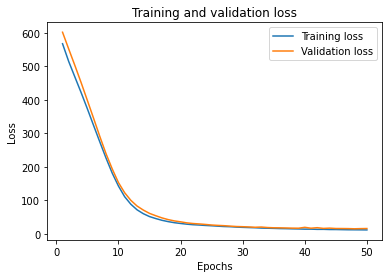

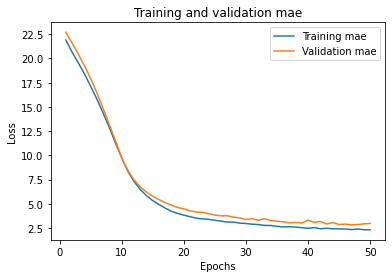

In [8]:
import matplotlib.pyplot as plt

print(history.history.keys())
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(epochs, mae, label='Training mae')
plt.plot(epochs, val_mae, label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### 이진분류 실습 -  IMDB

In [9]:
from tensorflow.keras.datasets import imdb

(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words = 10000)
print(train_data.shape, test_data.shape)

17464789/17464789 [==============================] - 1s 0us/step
(25000,) (25000,)


In [10]:
print(train_data[:2])
print(y_train[:2])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [12]:
import numpy as np

# 10000개의 단어 중에 review sample에서 사용한 단어만 1로 채우기
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                   epochs=20, batch_size=512,
                   validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                160016    
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
40/40 [==============================] - 3s 40ms/step - loss: 0.5104 - accuracy: 0.7879 - val_loss: 0.4048 - val_accuracy: 0.8546
Epoch 2/20
40/40 [==============================] - 1s 20ms/step - loss: 0.3010 - accuracy: 0.9037 - val_loss: 0.3009 - val_accuracy: 0.8910
Epoch 3/20
40/40 [============

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 시각화로 과적합 확인

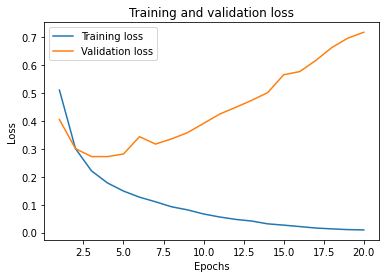

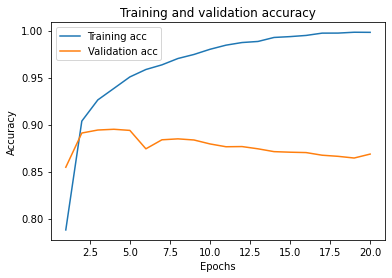

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Callback

In [16]:
import datetime
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        print('Training: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

    def on_train_batch_end(self, batch, logs=None):
        print('Training: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

    def on_test_batch_begin(self, batch, logs=None):
        print('Evaluating: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

    def on_test_batch_end(self, batch, logs=None):
        print('Evaluating: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

cb = MyCustomCallback()
x = np.arange(10)
y = x * 2
    
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='mse')    
model.fit(x,y, callbacks=[cb])
model.evaluate(x,y, callbacks=[cb])

Training: batch 0 begins at 10:25:47.218247
Training: batch 0 ends at 10:25:48.563306
1/1 [==============================] - 1s 1s/step - loss: 109.7760
Evaluating: batch 0 begins at 10:25:48.633120
Evaluating: batch 0 ends at 10:25:48.715580
1/1 [==============================] - 0s 100ms/step - loss: 109.6599


109.659912109375

#### EarlyStopping Callback 적용

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics=['accuracy'])
cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train, y_train, epochs=20, batch_size=512, callbacks=[cb],  validation_split=0.2)
results = model.evaluate(X_test, y_test)

Epoch 1/20
40/40 [==============================] - 2s 25ms/step - loss: 0.4551 - accuracy: 0.7901 - val_loss: 0.3426 - val_accuracy: 0.8622
Epoch 2/20
40/40 [==============================] - 1s 19ms/step - loss: 0.2538 - accuracy: 0.9010 - val_loss: 0.3054 - val_accuracy: 0.8802
Epoch 3/20
40/40 [==============================] - 1s 19ms/step - loss: 0.1899 - accuracy: 0.9269 - val_loss: 0.2843 - val_accuracy: 0.8942
Epoch 4/20
40/40 [==============================] - 1s 19ms/step - loss: 0.1470 - accuracy: 0.9439 - val_loss: 0.2937 - val_accuracy: 0.8920
Epoch 5/20
782/782 [==============================] - 2s 2ms/step - loss: 0.3519 - accuracy: 0.8747


### 다항 분류 실습 -  MNIST 손글씨
#### Data loading

11490434/11490434 [==============================] - 0s 0us/step
<class 'tuple'> 2
(60000, 28, 28) (10000,)
(10000, 28, 28) (10000,)
[5 0 4 1 9]


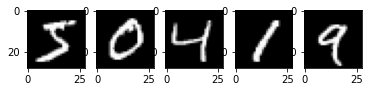

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist.load_data()
print(type(mnist), len(mnist))

(X_train, y_train), (X_test, y_test) = mnist
print(X_train.shape, y_test.shape)
print(X_test.shape, y_test.shape)

print(y_train[:5])
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap="gray")


#### Data preprocessing
* 정규화(Normalization)
    * 픽셀 데이타 : 0 ~ 255
    * 정규화 데이타 : 0 ~ 1  
* 2차원 이미지를 1차원으로 변경
    * (28,28)
    * (784)

In [19]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
(X_train, X_test) = (np.float32(X_train)/255, np.float32(X_test)/255)

n_input = 28*28
(X_train, X_test) = (X_train.reshape(-1, n_input), X_test.reshape(-1, n_input))

#### Neural Net 설계
* 입력 : 28*28
* layer1 : 300
* layer2 : 100
* 출력 : 10

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(28*28,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')])
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 300)               235500    
                                                                 
 dense_17 (Dense)            (None, 100)               30100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
480/480 [==============================] - 2s 4ms/step - loss: 0.4057 - accuracy: 0.8816 - val_loss: 0.1447 - val_accuracy: 0.9563
Epoch 2/10
480/480 [==================

#### 직접 쓴 숫자 prediction

In [21]:
import numpy as np
import cv2
import img2data

img_path = './img/0458.png'

image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (28,28), border=4)
for i, n in enumerate(numbers):
    pred = model.predict(n.astype(np.float32)/255.0)
    pred_label = np.argmax(pred, axis=1)
    print(pred, pred_label)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred_label))
    plt.imshow(n.reshape(28,28), cmap="gray")

ModuleNotFoundError: No module named 'cv2'